![](http://)<H1>Problem Understanding</H1>

The YouTube8M challenge is a multi-class classification problem, where we are asked to predict for each video, given video & frame level audio and frame RGB features, to which group of categories it belongs to.

We will be doing the below task

Simple Data Exploration,  Labels/classes study of sample videos. 


In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.3 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=2c43d072ea83468af8e255c1badbda4ff9511979fe4cf5a267be9c978ae4e3c7
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import seaborn as sns
from IPython.display import YouTubeVideo
import matplotlib.pyplot as plt
#import plotly.plotly as py
#import chart_studio.plotly as py

import os
#dirct = os.listdir() 
#print("Files and directories:") 
#print(dirct)
#input = os.listdir("../gdrive/MyDrive/input")
#print(input)
# frame level features file
#print(os.listdir("/frame"))


<H3>File descriptions</H3>
1. The following files are used to identify the labels as part od EDA activity

 **labels_names_2018.csv**:  a mapping between label_id and label_name <br>

 **vocabularu.csv:** :  the full data dictionary for label names and their descriptions <br>


1. **frame (frame-level data) :** contains frame level info for each video, again files are given in TFRecords format, lets see features <br>
    a. `id`: unique id for the video, in train set it is a YouTube video id, and in test/validation they are anonymized.<br>
    b. `labels`: list of labels of that video. <br>
    c. `rgb`: Each frame has float array of length 1024,<br>
    d. `audio`: Each frame has float array of length 128<br>
 



<H2>EDA </H2>

<h3>Let us first explore labels and their distributions</h3>

In [ ]:
!mkdir /gdrive/MyDrive/yt

mkdir: cannot create directory ‘/gdrive/MyDrive/yt’: No such file or directory


In [ ]:
!unzip /gdrive/MyDrive/youtube8m-2018.zip -d /gdrive/MyDrive/yt

unzip:  cannot find or open /gdrive/MyDrive/youtube8m-2018.zip, /gdrive/MyDrive/youtube8m-2018.zip.zip or /gdrive/MyDrive/youtube8m-2018.zip.ZIP.


In [ ]:
# total number of labels
labels_df = pd.read_csv('/gdrive/MyDrive/yt/label_names_2018.csv',usecols =["label_id","label_name"])
labels_df.head()


,label_id,label_name
0,0,Game
1,1,Video game
2,2,Vehicle
3,3,Concert
4,4,Musician


In [ ]:
print("Total numbers of labels in labels csv file are: %s" %(len(labels_df['label_name'].unique())))

Total numbers of labels in labels csv file are: 3861


In [ ]:
labels_df.shape

(3862, 2)

In [ ]:
vocab = pd.read_csv('/gdrive/MyDrive/yt/vocabulary.csv')

In [ ]:
vocab.head()

,Index,TrainVideoCount,KnowledgeGraphId,Name,WikiUrl,Vertical1,Vertical2,Vertical3,WikiDescription
0,0,788288,/m/03bt1gh,Game,https://en.wikipedia.org/wiki/Game,Games,NaN,NaN,"A game is structured form of play, usually und..."
1,1,539945,/m/01mw1,Video game,https://en.wikipedia.org/wiki/Video_game,Games,NaN,NaN,A video game is an electronic game that involv...
2,2,415890,/m/07yv9,Vehicle,https://en.wikipedia.org/wiki/Vehicle,Autos & Vehicles,NaN,NaN,A vehicle is a mobile machine that transports ...
3,3,378135,/m/01jddz,Concert,https://en.wikipedia.org/wiki/Concert,Arts & Entertainment,NaN,NaN,A concert is a live music performance in front...
4,4,286532,/m/09jwl,Musician,https://en.wikipedia.org/wiki/Musician,Arts & Entertainment,NaN,NaN,A musician is a person who plays a musical ins...


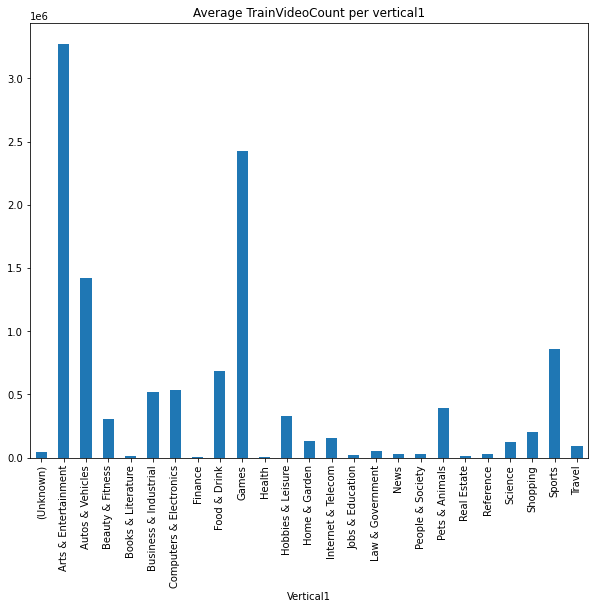

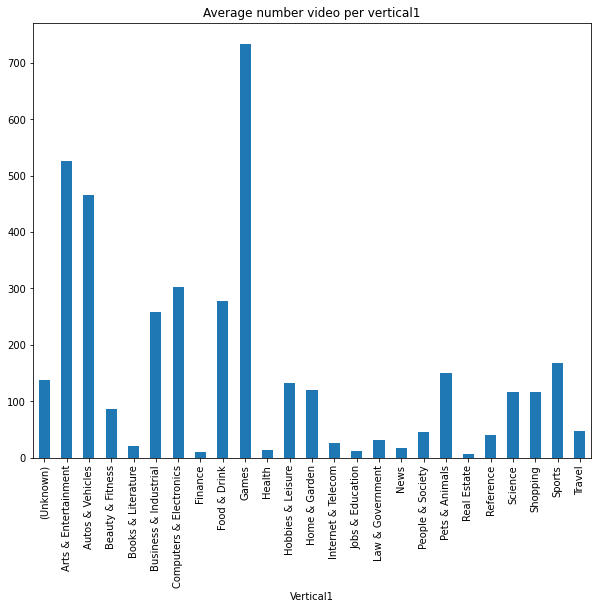

In [ ]:
plt.figure(figsize = (10,8))
vocab.groupby('Vertical1').TrainVideoCount.sum().plot(kind="bar")
plt.title("Average TrainVideoCount per vertical1")
plt.show()

plt.figure(figsize = (10,8))
vocab.groupby('Vertical1').Index.count().plot(kind="bar")
plt.title("Average number video per vertical1")
plt.show()

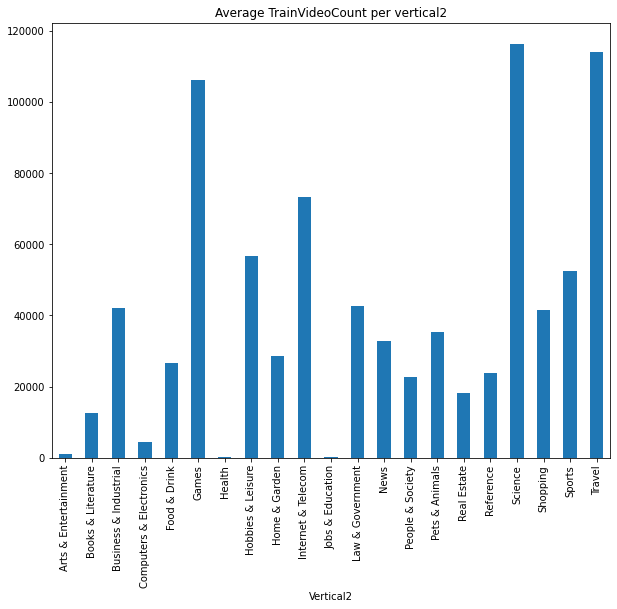

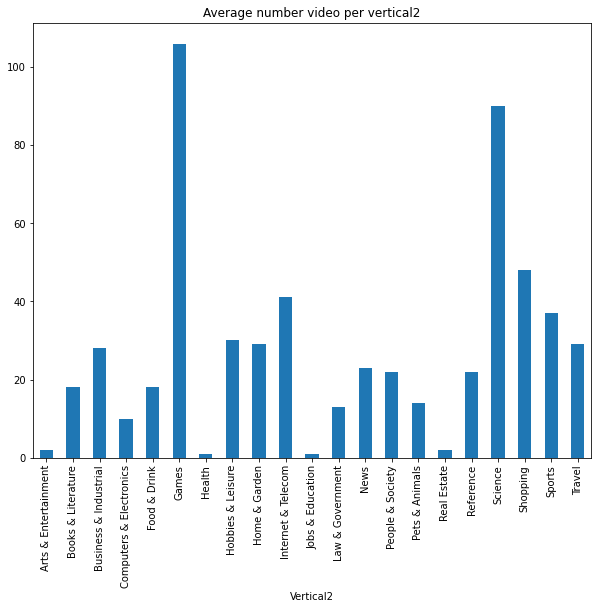

In [ ]:
plt.figure(figsize = (10,8))
vocab.groupby('Vertical2').TrainVideoCount.sum().plot(kind="bar")
plt.title("Average TrainVideoCount per vertical2")
plt.show()

plt.figure(figsize = (10,8))
vocab.groupby('Vertical2').Index.count().plot(kind="bar")
plt.title("Average number video per vertical2")
plt.show()

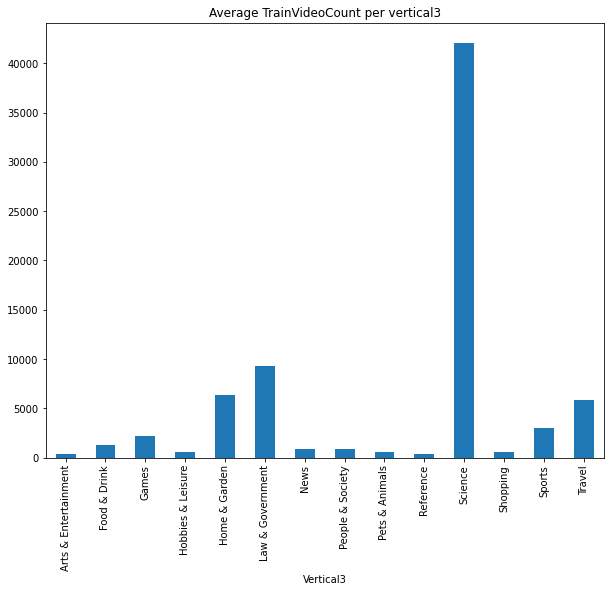

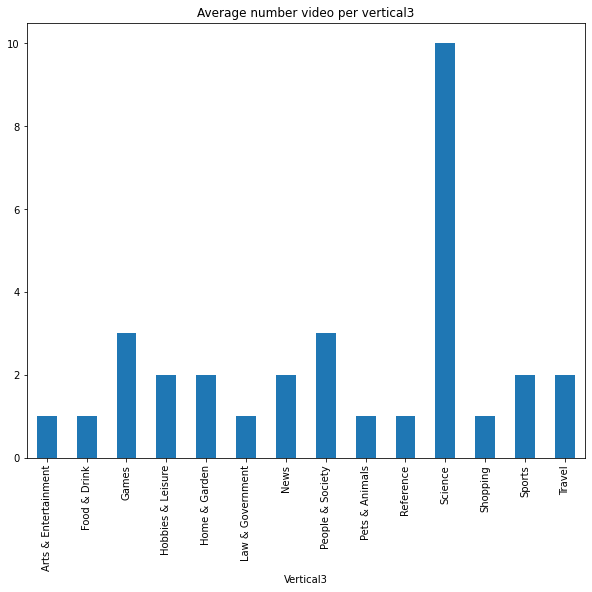

In [ ]:
plt.figure(figsize = (10,8))
vocab.groupby('Vertical3').TrainVideoCount.sum().plot(kind="bar")
plt.title("Average TrainVideoCount per vertical3")
plt.show()

plt.figure(figsize = (10,8))
vocab.groupby('Vertical3').Index.count().plot(kind="bar")
plt.title("Average number video per vertical3")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


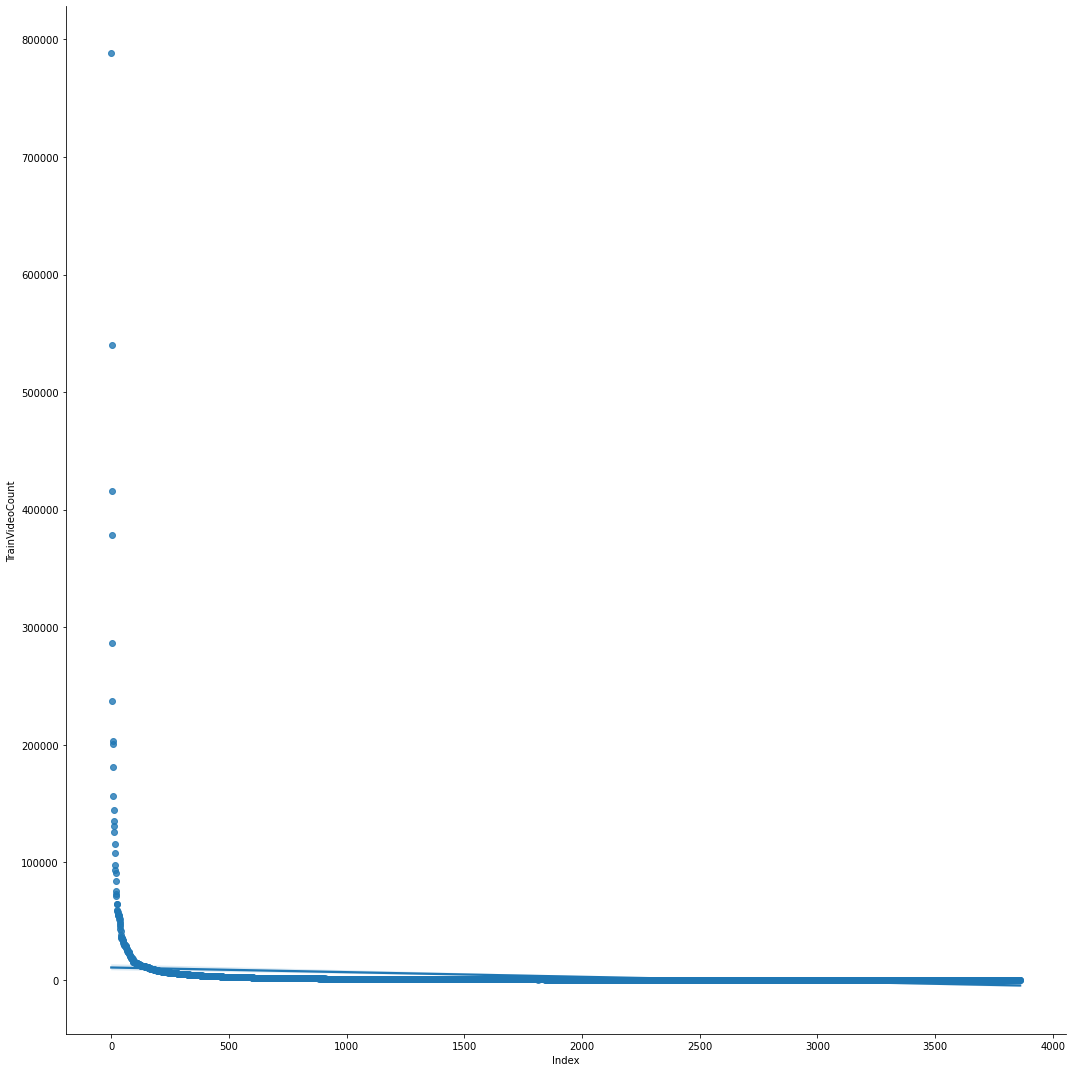

In [ ]:
sns.lmplot(x='Index', y='TrainVideoCount', data=vocab , size=15)

In [ ]:
!unzip /gdrive/MyDrive/yt/video-sample.zip -d /gdrive/MyDrive/yt/

Archive:  /gdrive/MyDrive/yt/video-sample.zip
replace /gdrive/MyDrive/yt/video/train01.tfrecord? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /gdrive/MyDrive/yt/video/train00.tfrecord? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
video_files = ["/gdrive/MyDrive/yt/video/{}".format(i) for i in os.listdir("/gdrive/MyDrive/yt/video/")]
print(video_files)

['/gdrive/MyDrive/yt/video/train00.tfrecord', '/gdrive/MyDrive/yt/video/train01.tfrecord']


In [ ]:
vid_ids = []
labels = []
mean_rgb = []
mean_audio = []

In [ ]:
pip install tensorflow-io

In [ ]:
for file in video_files:
    for example in tf.compat.v1.io.tf_record_iterator(file):
        tf_example = tf.train.Example.FromString(example)
        
        vid_ids.append(tf_example.features.feature['id'].bytes_list.value[0].decode(encoding='UTF-8'))
        labels.append(tf_example.features.feature['labels'].int64_list.value)
        mean_rgb.append(tf_example.features.feature['mean_rgb'].float_list.value)
        mean_audio.append(tf_example.features.feature['mean_audio'].float_list.value)
        
print('Number of videos in Sample data set: %s' % str(len(vid_ids)))
print('Picking a youtube video id: %s' % vid_ids[13])
print('List of label ids for youtube video id %s, are - %s' % (vid_ids[13], str(labels[13])))
print('First 20 rgb feature of a youtube video (',vid_ids[13],'): are - %s' % str(mean_rgb[13][:20]))

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Number of videos in Sample data set: 2056
Picking a youtube video id: 1r00
List of label ids for youtube video id 1r00, are - [141, 247, 255]
First 20 rgb feature of a youtube video ( 1r00 ): are - [-0.13220332562923431, 0.4008486270904541, -0.38416850566864014, 0.5839489698410034, -0.18826593458652496, -0.6205881237983704, -0.4101247191429138, -0.5345597863197327, -0.31811732053756714, 0.2005145102739334, -0.37854114174842834, 0.3848106563091278, 0.1220831423997879, 0.4372154772281647, -0.2255472093820572, 0.3350788354873657, -0.31312304735183716, -0.4648508131504059, -0.3584936559200287, 0.3542822003364563]


In [ ]:
def parser(record, training=True):
    """
    In training mode labels will be returned, otherwise they won't be
    """
    keys_to_features = {
        "mean_rgb": tf.FixedLenFeature([1024], tf.float32),
        "mean_audio": tf.FixedLenFeature([128], tf.float32)
    }
    
    if training:
        keys_to_features["labels"] =  tf.VarLenFeature(tf.int64)
    
    parsed = tf.parse_single_example(record, keys_to_features)
    x = tf.concat([parsed["mean_rgb"], parsed["mean_audio"]], axis=0)
    if training:
        y = tf.sparse_to_dense(parsed["labels"].values, [3862], 1)
        return x, y
    else:
        x = tf.concat([parsed["mean_rgb"], parsed["mean_audio"]], axis=0)
        return x

In [ ]:
def make_datasetprovider(tf_records, repeats=1000, num_parallel_calls=12, 
                         batch_size=32): 
    """
    tf_records: list of strings - tf records you are going to use.
    repeats: how many times you want to iterate over the data.
    """
    dataset = tf.data.TFRecordDataset(tf_records)
    dataset = dataset.map(map_func=parser, num_parallel_calls=num_parallel_calls)
    dataset = dataset.repeat(repeats)

    dataset = dataset.shuffle(buffer_size=1000)
    dataset = dataset.batch(batch_size)

    d_iter = dataset.make_one_shot_iterator()
    return d_iter


In [ ]:
def data_generator(tf_records, batch_size=1, repeats=1000, num_parallel_calls=12, ):
    tf_provider = make_datasetprovider(tf_records, repeats=repeats, num_parallel_calls=num_parallel_calls,
                                       batch_size=batch_size)
    sess = tf.Session()
    next_el = tf_provider.get_next()
    while True:
        try:
          yield sess.run(next_el)
        except tf.errors.OutOfRangeError:
            print("Iterations exhausted")
            break

In [ ]:
frame_lvl_record = "/gdrive/MyDrive/yt/video/train01.tfrecord"

<h4>Exploring video level data</h4>

In [ ]:
# distribution of labels
#video_files = ["./gdrive/MyDrive/yt/video/{}".format(i) for i in os.listdir("/gdrive/MyDrive/yt/video")]
#print(video_files)
video_files = "/gdrive/MyDrive/yt/video/train00.tfrecord"
vid_ids = []
labels = []
mean_rgb = []
mean_audio = []

#for file in video_files:
for example in tf.compat.v1.python_io.tf_record_iterator(frame_lvl_record):
  tf_example = tf.train.Example.FromString(example)

  vid_ids.append(tf_example.features.feature['id'].bytes_list.value[0].decode(encoding='UTF-8'))
  labels.append(tf_example.features.feature['labels'].int64_list.value)
  mean_rgb.append(tf_example.features.feature['mean_rgb'].float_list.value)
  mean_audio.append(tf_example.features.feature['mean_audio'].float_list.value)

print('Number of videos in Sample data set: %s' % str(len(vid_ids)))
print('Picking a youtube video id: %s' % vid_ids[13])
print('List of label ids for youtube video id %s, are - %s' % (vid_ids[13], str(labels[13])))
print('First 20 rgb feature of a youtube video (',vid_ids[13],'): are - %s' % str(mean_rgb[13][:20]))


Number of videos in Sample data set: 1041
Picking a youtube video id: d801
List of label ids for youtube video id d801, are - [2, 7, 2563, 3421]
First 20 rgb feature of a youtube video ( d801 ): are - [-0.11217081546783447, 0.08129324018955231, -0.7469642758369446, 0.04547068476676941, -0.5786427855491638, 0.0860769972205162, -1.2731776237487793, 0.35875117778778076, -0.3402336835861206, -0.9614546298980713, 0.9636183977127075, -1.314117670059204, 0.5694590210914612, -0.891255795955658, 0.2739785313606262, 0.2924460768699646, -0.4201112985610962, -0.643946647644043, 0.28065356612205505, -0.07367825508117676]


> <h2>Lets have a look at the most common labels and the relation among thems </h2>

In [ ]:
# Lets convert labels for each video into their respective names
labels_name = []
for row in labels:
    n_labels = []
    for label_id in row:
        # some labels ids are missing so have put try/except
        try:
            n_labels.append(str(labels_df[labels_df['label_id']==label_id]['label_name'].values[0]))
        except:
            continue
    labels_name.append(n_labels)

print('List of label names for youtube video id %s, are - %s' % (vid_ids[13], str(labels_name[13])))

List of label names for youtube video id d801, are - ['Vehicle', 'Car', 'Peugeot 206', 'Axle']


In [ ]:
plt.figure(figsize = (10,8))
vocabulary.groupby('Vertical1').TrainVideoCount.sum().plot(kind="bar")
plt.title("Average TrainVideoCount per vertical1")
plt.show()

plt.figure(figsize = (10,8))
vocabulary.groupby('Vertical1').Index.count().plot(kind="bar")
plt.title("Average number video per vertical1")
plt.show()

In [ ]:
# creating labels count dictionary
from collections import Counter
import operator

all_labels = []
for each in labels_name:
    all_labels.extend(each)

labels_count_dict = dict(Counter(all_labels))

Lets have a look at distribution of top 25 labels

Text(0.5, 1.0, 'Top 25 labels with sample count')

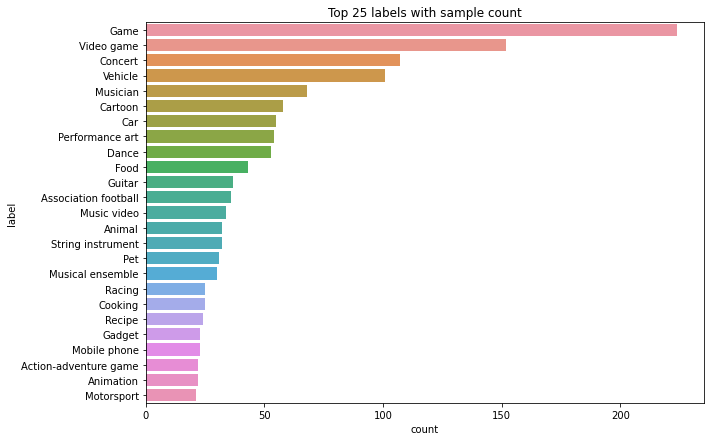

In [ ]:
# creating label count dataframe
labels_count_df = pd.DataFrame.from_dict(labels_count_dict, orient='index').reset_index()
labels_count_df.columns = ['label', 'count']
sorted_labels_count_df = labels_count_df.sort_values('count', ascending=False)

# plotting top 25 labels distribution
TOP = 25
TOP_labels = list(sorted_labels_count_df['label'])[:TOP]
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(y='label', x='count', data=sorted_labels_count_df.iloc[0:TOP, :])
plt.title('Top {} labels with sample count'.format(TOP))


Lets explore most common occuring labels with these top 25 labels.

Text(0.5, 1.0, 'Top 25 common occur labels with sample count')

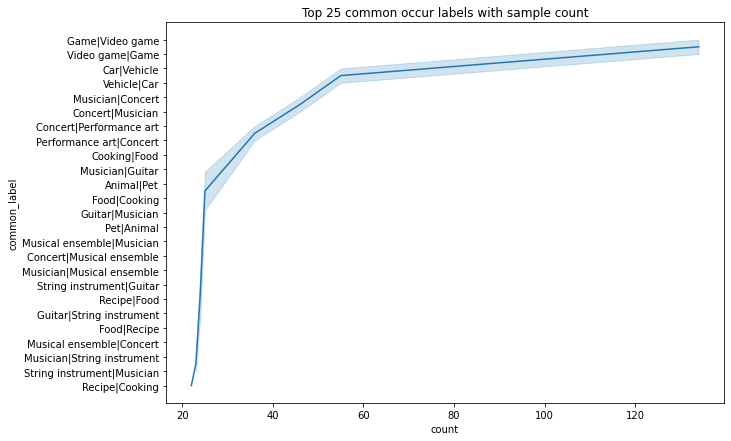

In [ ]:
# creating common occurs labels count dict
common_occur_top_label_dict = {}
for row in labels_name:
    for label in row:
        if label in TOP_labels:
            c_labels = [label + "|" + x for x in row if x != label]
            for c_label in c_labels: 
                common_occur_top_label_dict[c_label] = common_occur_top_label_dict.get(c_label, 0) + 1

# creating dataframe
common_occur_top_label_df = pd.DataFrame.from_dict(common_occur_top_label_dict, orient='index').reset_index()
common_occur_top_label_df.columns = ['common_label', 'count']
sorted_common_occur_top_label_df = common_occur_top_label_df.sort_values('count', ascending=False)


# plotting 25 common occurs labels from top labels
TOP = 25
fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(y='common_label', x='count', data=sorted_common_occur_top_label_df.iloc[0:TOP, :])
plt.title('Top {} common occur labels with sample count'.format(TOP))


This shows game and vehicle are most commonly occurs labels among sample youtube videos

<H2> Create Network Graph For Top Labels</H2>

In [ ]:
# libraries
import pandas as pd
import numpy as np
 
top_cooccurance_label_dict = {}
for row in labels_name:
    for label in row:
        if label in TOP_labels:
            top_label_siblings = [x for x in row if x != label]
            for sibling in top_label_siblings:
                if label not in top_cooccurance_label_dict:
                    top_cooccurance_label_dict[label] = {}
                top_cooccurance_label_dict[label][sibling] = top_cooccurance_label_dict.get(label, {}).get(sibling, 0) + 1

from_label= []
to_label = []
value = []
for key, val in top_cooccurance_label_dict.items():
    for key2, val2 in val.items():
        from_label.append(key)
        to_label.append(key2)
        value.append(val2)

df = pd.DataFrame({ 'from': from_label, 'to': to_label, 'value': value})
sorted_df = df.sort_values('value', ascending=False)
sorted_df = sorted_df.iloc[:101, ]

In [ ]:
node_colors = ['turquoise', 'turquoise', 'green', 'crimson', 'grey', 'turquoise', 'turquoise', 
'grey', 'skyblue', 'crimson', 'yellow', 'green', 'turquoise', 
'skyblue', 'skyblue', 'green', 'green', 'lightcoral', 'grey', 'yellow', 
'turquoise', 'skyblue', 'orange', 'green', 'skyblue', 'green', 'turquoise', 
'lightcoral', 'yellow', 'lightcoral', 'green', 'turquoise', 'lightcoral', 'turquoise', 
'yellow', 'orange', 'lightcoral', 'grey', 'green', 'orange', 'crimson', 
'skyblue', 'lightcoral', 'lightcoral', 'skyblue', 'crimson', 'yellow', 'lightcoral', 
'yellow']


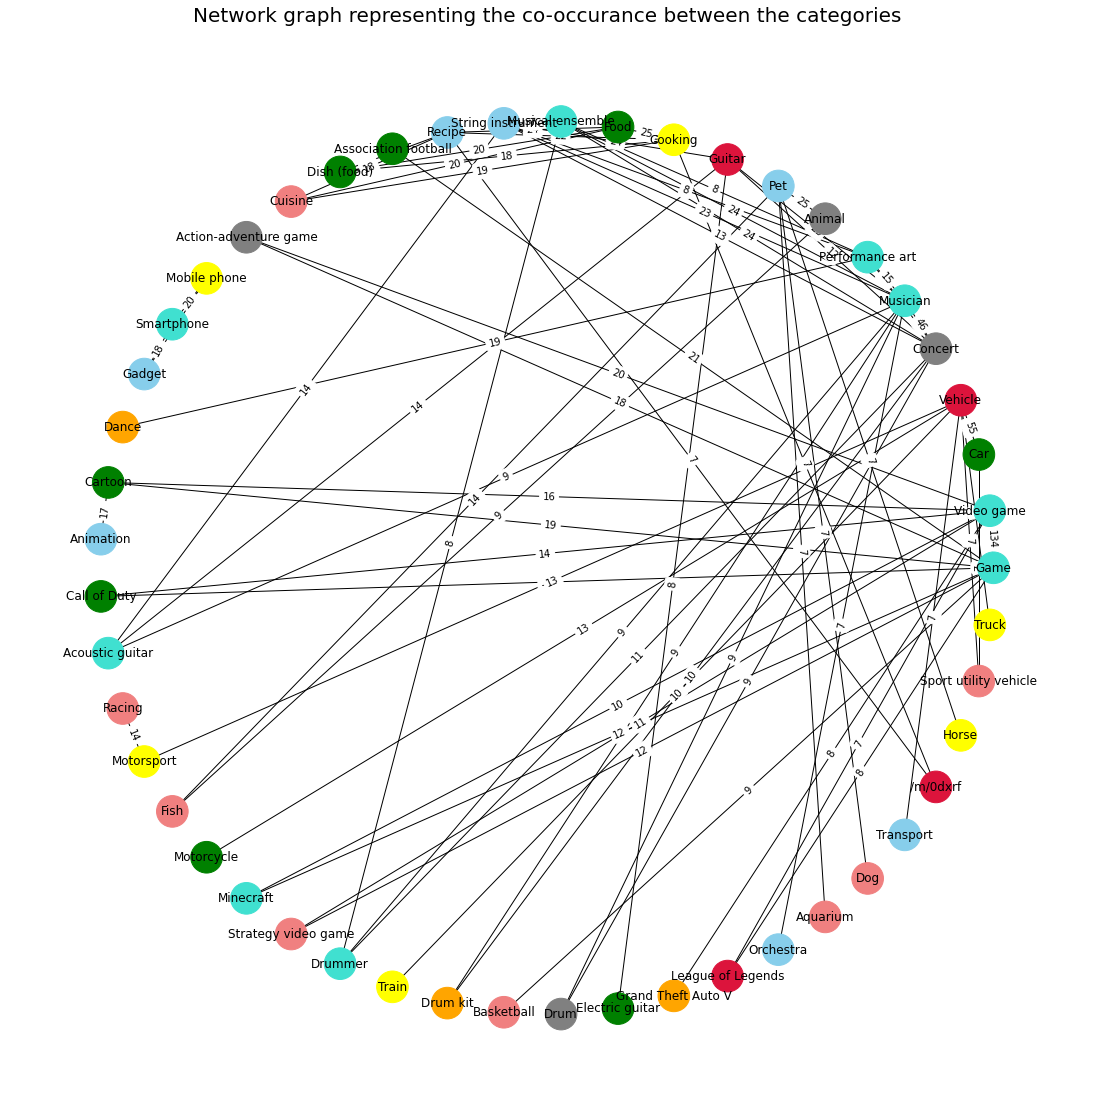

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
 
df = sorted_df
# Build your graph

G=nx.from_pandas_edgelist(df, 'from', 'to', 'value', create_using=nx.Graph() )
plt.figure(figsize = (15,15))
nx.draw(G, pos=nx.circular_layout(G), node_size=1000, with_labels=True, node_color=node_colors)
nx.draw_networkx_edge_labels(G, pos=nx.circular_layout(G), edge_labels=nx.get_edge_attributes(G, 'value'))
plt.title('Network graph representing the co-occurance between the categories', size=20)
plt.show()


<H3> let's  Explore frame-level data for videos </H3>

In [ ]:
!unzip /gdrive/MyDrive/yt/frame-sample.zip -d /gdrive/MyDrive/yt/

Archive:  /gdrive/MyDrive/yt/frame-sample.zip
   creating: /gdrive/MyDrive/yt/frame/
  inflating: /gdrive/MyDrive/yt/frame/train01.tfrecord  
  inflating: /gdrive/MyDrive/yt/frame/train00.tfrecord  


In [ ]:
frame_files = "/gdrive/MyDrive/yt/frame/train00.tfrecord"
feat_rgb = []
feat_audio = []
feature_id=[]
label_test=[]
#for file in video_files:
for example in tf.compat.v1.python_io.tf_record_iterator(frame_files):
  #tf_example = tf.train.Example.FromString(example)
#for file in frame_files:
    #for example in tf.python_io.tf_record_iterator(file):        
        tf_seq_example = tf.train.SequenceExample.FromString(example)
        tf_example = tf.train.Example.FromString(example)
        n_frames = len(tf_seq_example.feature_lists.feature_list['audio'].feature)
        feature_id.append(tf_example.features.feature['id'].bytes_list.value[0].decode(encoding='UTF-8'))
        label_test.append(tf_example.features.feature['labels'].int64_list.value)
        sess = tf.compat.v1.InteractiveSession()
        rgb_frame = []
        audio_frame = []
        # iterate through frames
        for i in range(n_frames):
            rgb_frame.append(tf.cast(tf.compat.v1.decode_raw(
                    tf_seq_example.feature_lists.feature_list['rgb'].feature[i].bytes_list.value[0],tf.uint8)
                           ,tf.float32).numpy())
            audio_frame.append(tf.cast(tf.compat.v1.decode_raw(
                    tf_seq_example.feature_lists.feature_list['audio'].feature[i].bytes_list.value[0],tf.uint8)
                           ,tf.float32).numpy())
         

        sess.close()
        feat_rgb.append(rgb_frame)
        feat_audio.append(audio_frame)
        break

In [ ]:
print("No. of videos %d" % len(feat_rgb))
print('The first video has %d frames' %len(feat_rgb[0]))
print("Max frame length is: %d" % max([len(x) for x in feat_rgb]))

No. of videos 1
The first video has 234 frames
Max frame length is: 234


In [ ]:
feat_audio

[[array([119., 123., 161., 191., 220.,  35.,  73., 134., 126., 161., 162.,
         169.,  76., 115., 227., 161.,  92.,  60., 148., 119.,  53., 251.,
         133., 121., 165., 130., 200.,  85., 220., 218., 176., 163., 154.,
         137., 145.,  13., 110.,  42.,  86.,  82., 130., 135., 194., 240.,
         139.,  40.,  27., 111., 126.,  87., 118., 152., 192.,  53.,   0.,
         108.,  69., 219., 189.,   0., 195., 131.,  34., 255.,  45.,  44.,
          53., 136., 226., 228., 209., 185.,  51., 160., 255., 218., 130.,
         200.,  33.,  44., 255., 103., 143.,  34., 205., 152.,  86., 183.,
         172.,  41., 149., 205., 238., 220., 148., 153., 159.,  86., 102.,
         108., 114., 234., 180., 239., 169., 126., 115.,  40., 140., 215.,
          90.,   0., 170., 128., 179., 218.,  29.,  77., 103.,   0., 122.,
         114.,   0., 168., 186., 204., 190., 130.], dtype=float32),
  array([ 80., 126., 141.,  87., 232.,  88., 138.,  83.,  79., 121., 166.,
         238.,  89.,  77., 255.,